In [10]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import os
matplotlib.rcParams["axes.spines.right"] = False
matplotlib.rcParams["axes.spines.top"] = False

In [2]:
partridge_tpe = pd.read_csv('../partridge_river_TPE_926_nwts/nwt_performance.csv')
partridge_tpe.head()

,NWT Number,Start Time,Finish Time,Loss,Mass Balance,Seconds Elapased,# of Iterations,Min Loss
0,0,2021-09-26 16:56:27,2021-09-26 17:02:05,1.000000e+12,999999.0,999999.0,-1.0,9999.0
1,1,2021-09-26 16:56:28,2021-09-26 17:08:58,1.000000e+12,999999.0,750.0,-1.0,9999.0
2,2,2021-09-26 16:56:32,2021-09-26 17:09:02,1.000000e+12,999999.0,750.0,-1.0,9999.0
3,3,2021-09-26 16:56:36,2021-09-26 17:09:06,1.000000e+12,999999.0,750.0,-1.0,9999.0
4,4,2021-09-26 16:56:36,2021-09-26 17:09:06,1.000000e+12,999999.0,750.0,-1.0,9999.0


In [3]:
partridge_random = pd.read_csv('../partridge_river_rand_926_nwts/nwt_performance.csv')
partridge_random.head()

,NWT Number,Start Time,Finish Time,Loss,Mass Balance,Seconds Elapased,# of Iterations,Min Loss
0,0,2021-09-26 18:20:48,2021-09-26 18:33:18,1.000000e+12,999999.0,750.0,-1.0,9999.0
1,1,2021-09-26 18:20:50,2021-09-26 18:33:20,1.000000e+12,999999.0,750.0,-1.0,9999.0
2,2,2021-09-26 18:20:52,2021-09-26 18:33:22,1.000000e+12,999999.0,750.0,-1.0,9999.0
3,3,2021-09-26 18:20:53,2021-09-26 18:33:23,1.000000e+12,999999.0,750.0,-1.0,9999.0
4,4,2021-09-26 18:20:53,2021-09-26 18:33:23,1.000000e+12,999999.0,750.0,-1.0,9999.0


In [16]:
tpe_clean = partridge_tpe[(partridge_tpe['Loss'] < 800)].dropna()
random_clean = partridge_random[(partridge_random['Loss'] < 800)].dropna()
print(tpe_clean.shape, random_clean.shape)

(1862, 8) (280, 8)


In [18]:
combined = pd.DataFrame()
combined['NWTOPT'] = tpe_clean['Loss']
combined['Random Search'] = random_clean['Loss']
max(combined['NWTOPT'])

751.3735357861004

In [19]:
def set_style():
    plt.style.use(['seaborn-paper'])
set_style()

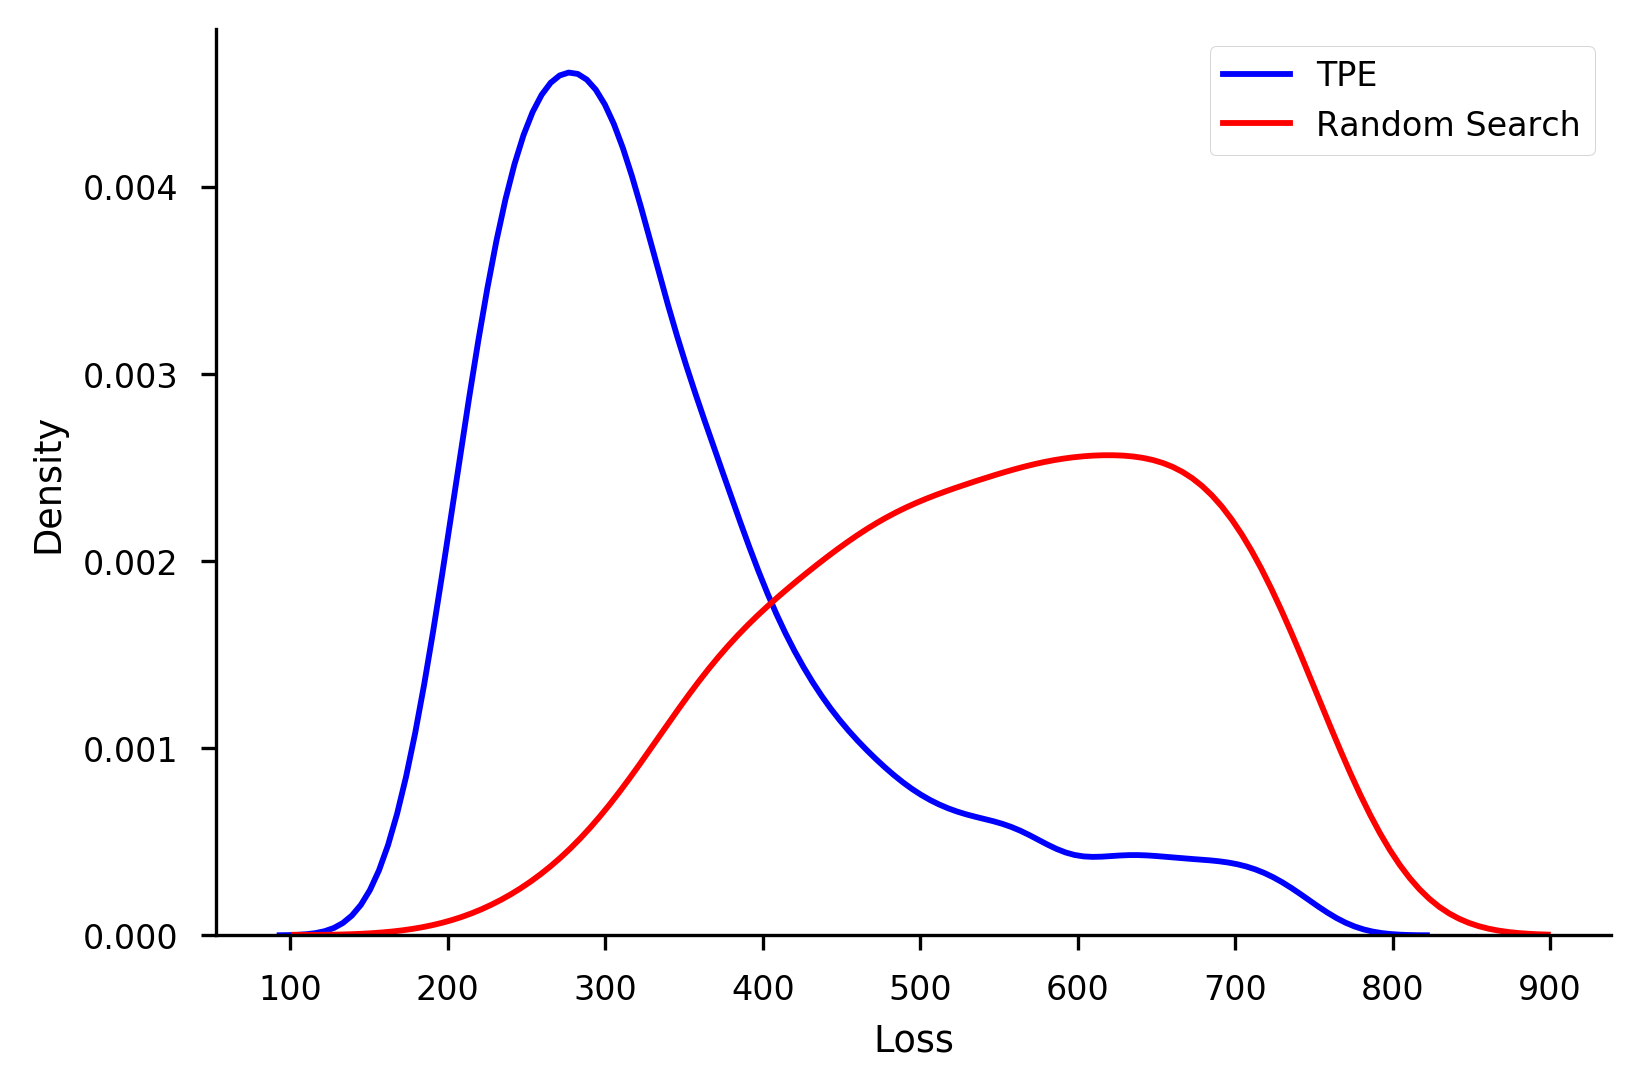

In [22]:
plt.figure(figsize = (6, 4), dpi = 300)
sns.kdeplot(data = combined['NWTOPT'], color = 'b', label = 'TPE')
sns.kdeplot(data = combined['Random Search'], color = 'r')
plt.xlabel('Loss')
plt.ylabel('Density')
# plt.title('NWTOPT vs. Random Loss KDE Distributions - Partridge River Steady-State')
plt.savefig('./partridge_dist.png')
plt.show()

In [23]:
meras_tpe = pd.read_csv('../MAP_tpe_926_nwts/nwt_performance.csv')
meras_tpe.head()

,NWT Number,Start Time,Finish Time,Loss,Mass Balance,Seconds Elapased,# of Iterations,Min Loss
0,0,2021-09-26 21:11:27,2021-09-27 02:26:27,1.000000e+12,999999.00,18900.0,-1.0,9999.0
1,1,2021-09-26 21:11:39,2021-09-27 01:43:51,1.706836e+04,0.21,16332.0,9.0,9999.0
2,2,2021-09-26 21:11:42,2021-09-27 02:26:42,1.000000e+12,999999.00,18900.0,-1.0,9999.0
3,3,2021-09-26 21:11:42,2021-09-26 22:31:09,1.000000e+12,999999.00,999999.0,-1.0,9999.0
4,4,2021-09-26 21:11:43,2021-09-26 23:58:23,1.173511e+04,-0.40,10000.0,10.0,9999.0


In [25]:
meras_random = pd.read_csv('../MAP_rand_927_nwts/nwt_performance.csv')
meras_random.head()

,NWT Number,Start Time,Finish Time,Loss,Mass Balance,Seconds Elapased,# of Iterations,Min Loss
0,0,2021-09-27 14:59:44,2021-09-27 14:59:50,1.000000e+12,999999.0,999999.0,-1.0,9999.0
1,1,2021-09-27 14:59:44,2021-09-27 20:14:44,1.000000e+12,999999.0,18900.0,-1.0,9999.0
2,2,2021-09-27 14:59:45,2021-09-27 20:14:45,1.000000e+12,999999.0,18900.0,-1.0,9999.0
3,3,2021-09-27 14:59:45,2021-09-27 20:14:45,1.000000e+12,999999.0,18900.0,-1.0,9999.0
4,4,2021-09-27 14:59:47,2021-09-27 20:14:47,1.000000e+12,999999.0,18900.0,-1.0,9999.0


In [26]:
tpe_clean = meras_tpe[(meras_tpe['Loss'] < 9000)].dropna()
random_clean = meras_random[(meras_random['Loss'] < 9000)].dropna()
combined = pd.DataFrame()
combined['NWTOPT'] = tpe_clean['Loss']
combined['Random Search'] = random_clean['Loss']
combined.head()

,NWTOPT,Random Search
10,8977.022858,NaN
12,8149.000000,NaN
17,7856.133993,NaN
49,7175.357876,NaN
76,5132.204962,NaN


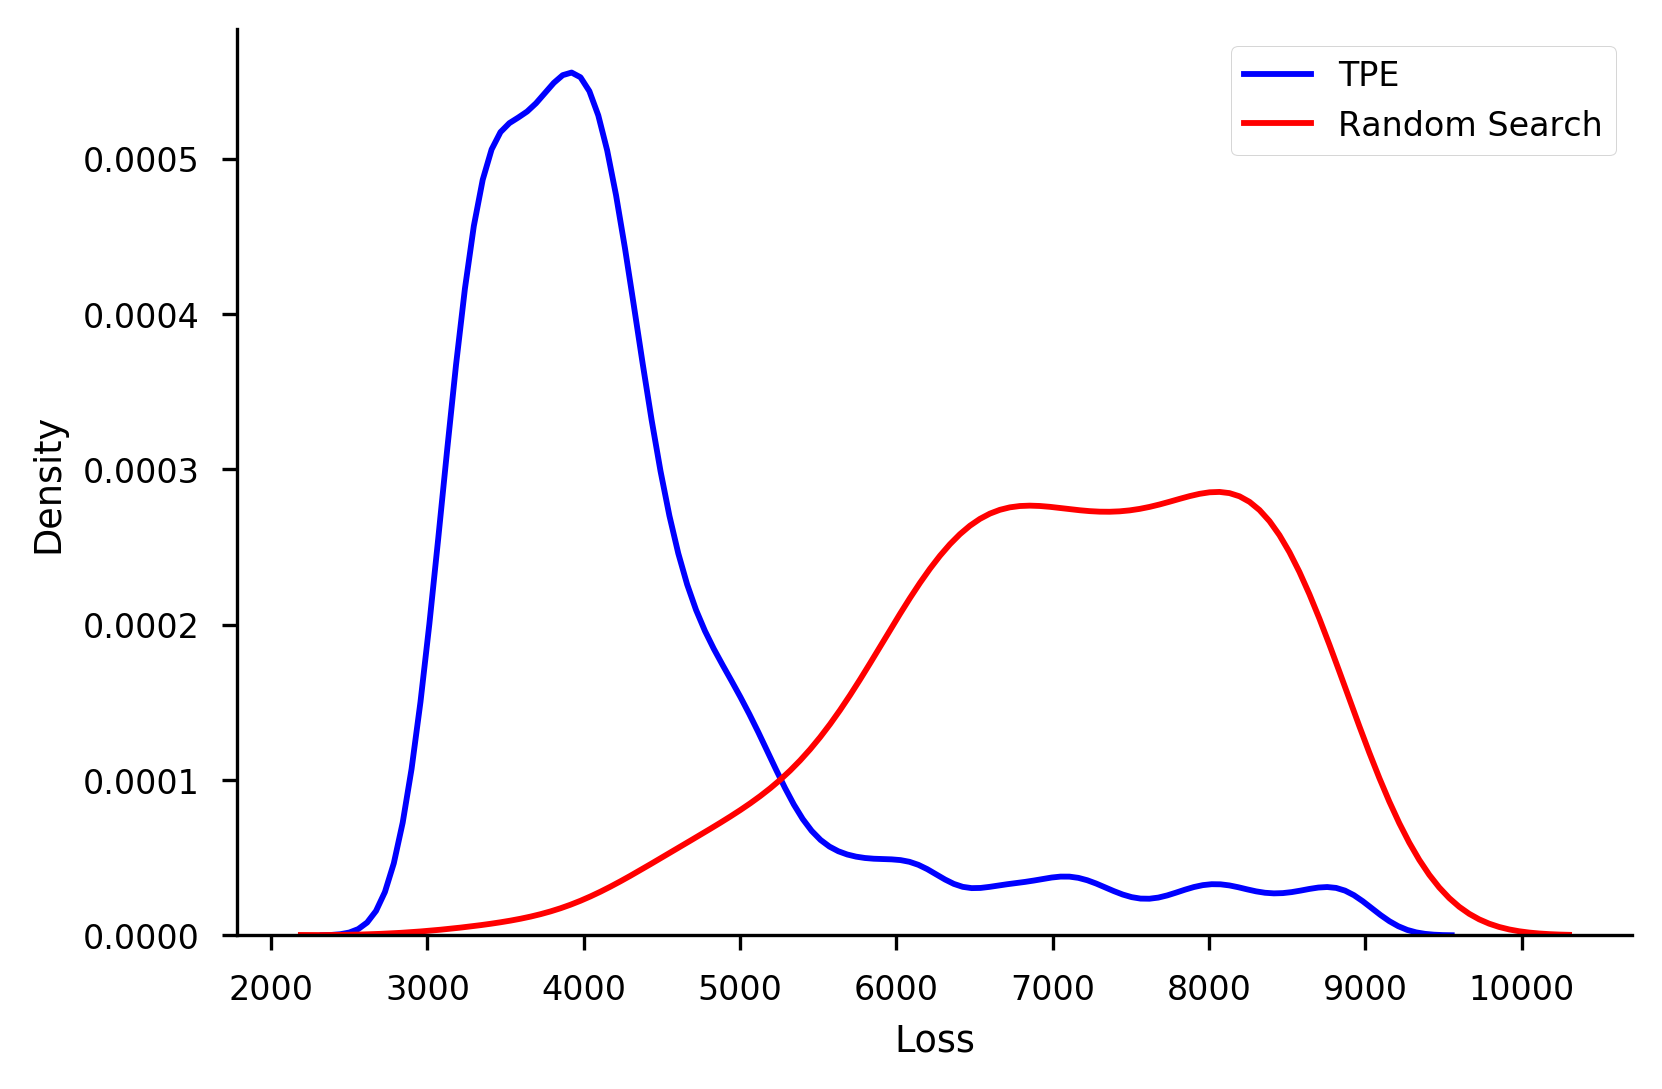

In [27]:
plt.figure(figsize = (6, 4), dpi = 300)
sns.kdeplot(data = combined['NWTOPT'], color = 'b', label = 'TPE')
sns.kdeplot(data = combined['Random Search'], color = 'r')
plt.xlabel('Loss')
plt.ylabel('Density')
# plt.title('NWTOPT vs. Random Loss KDE Distributions - MAP Transient')
plt.savefig('./meras_dist.png')
plt.show()

In [ ]:
error_lines = meras_tpe[(meras_tpe['Mass Balance'] == 999999)]['NWT Number'].to_list()

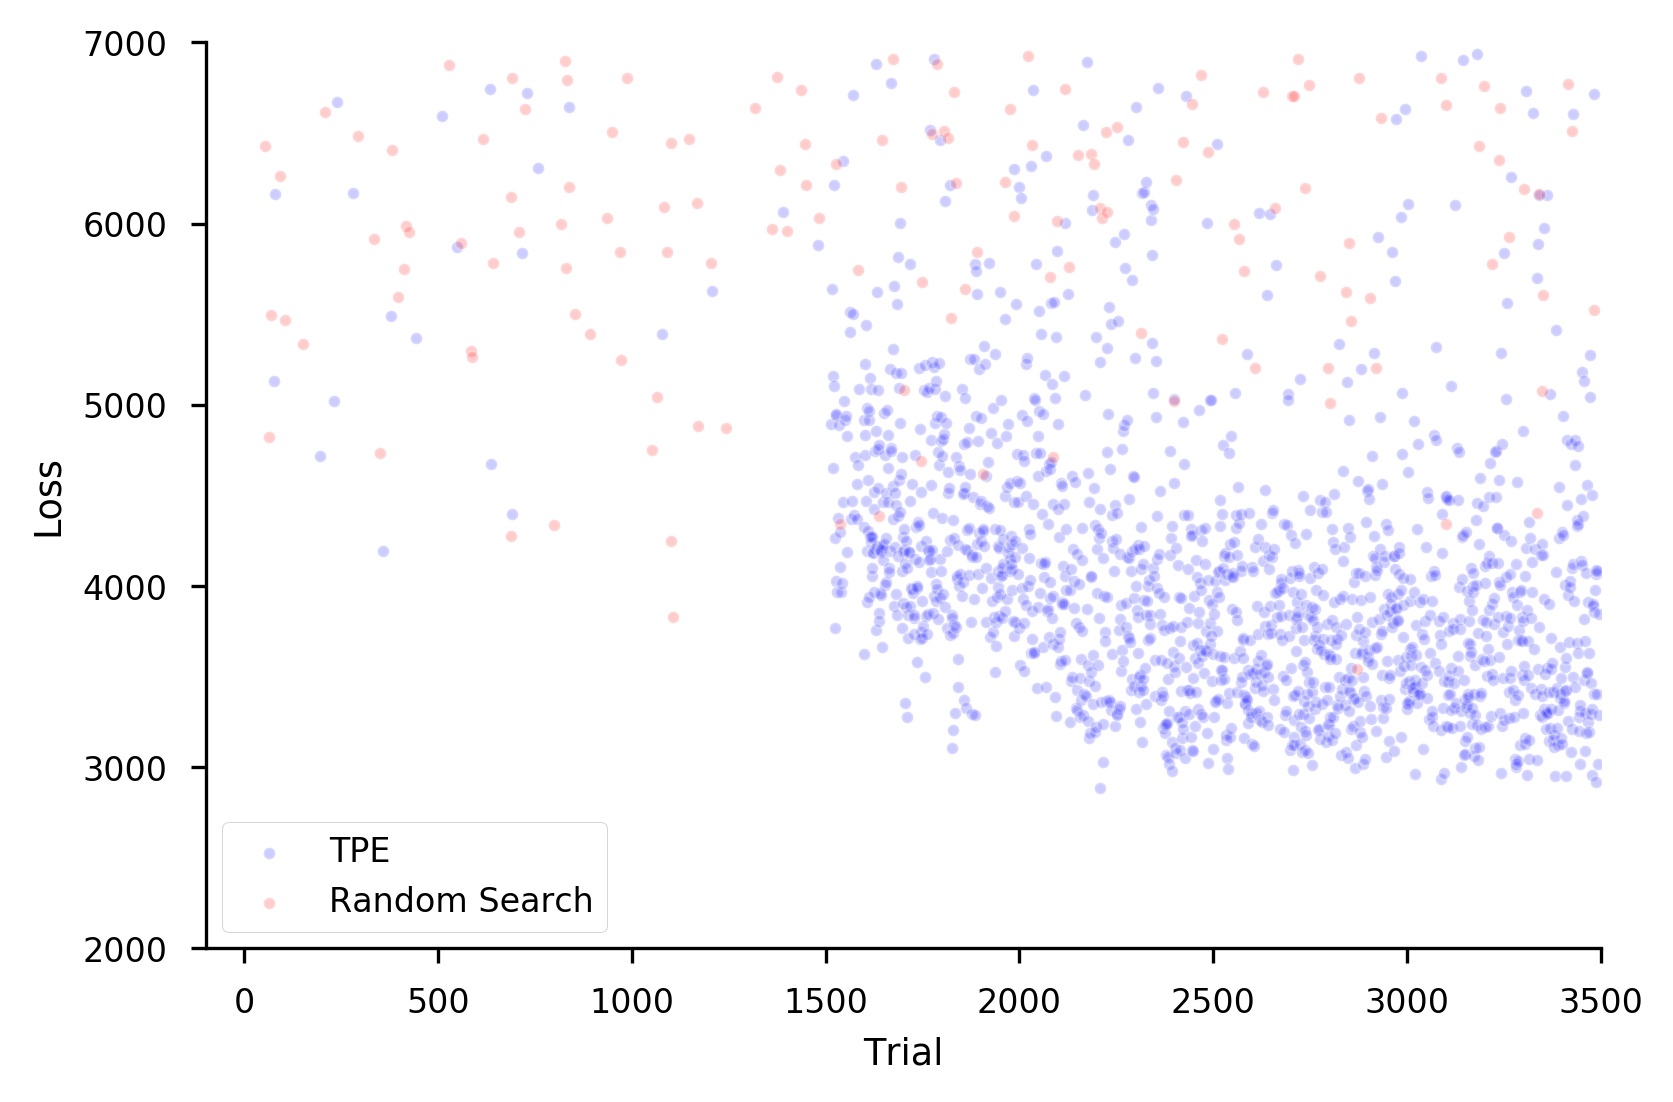

In [32]:
f, ax = plt.subplots(1, 1, figsize = (6, 4), dpi = 300)
sns.scatterplot(ax = ax, data = meras_tpe[(meras_tpe['Loss'] < 6950) & (meras_tpe['NWT Number'] < 3500)], x = 'NWT Number', y = 'Loss', color = 'b', marker = '.', alpha = .2)
sns.scatterplot(ax = ax, data = meras_random[meras_random['Loss'] < 6950], x = 'NWT Number', y = 'Loss', color = 'r', alpha = .2, marker = '.')
# plt.vlines(x = error_lines, ymin = 2000, ymax = 7000, alpha = .01)
plt.ylim(2000, 7000)
plt.xlim(-100, 3500)
ax.legend(labels=["TPE","Random Search"])
plt.xlabel('Trial')
plt.ylabel('Loss')
# plt.title('NWTOPT vs. Random Search by epoch - MAP Transient')
plt.savefig('./meras_loss_compare.png')
plt.show()

In [30]:
from tqdm import tqdm
meras_tpe['Start Time'] = pd.to_datetime(meras_tpe['Start Time'])
meras_tpe['Finish Time'] = pd.to_datetime(meras_tpe['Finish Time'])
num_before_col = []
for i in tqdm(range(3500)):
    num_before = 0
    curr_row_start = meras_tpe.at[i, 'Start Time']
    for j in range(i):
        if meras_tpe.at[j,'Finish Time'] < curr_row_start:
            num_before += 1
    num_before_col += [num_before]
meras_tpe['num_before'] = num_before_col





100%|██████████| 3500/3500 [00:48<00:00, 72.34it/s] 


In [31]:

meras_random['Start Time'] = pd.to_datetime(meras_random['Start Time'])
meras_random['Finish Time'] = pd.to_datetime(meras_random['Finish Time'])
num_before_col = []
for i in tqdm(range(3500)):
    num_before = 0
    curr_row_start = meras_random.at[i, 'Start Time']
    for j in range(i):
        if meras_random.at[j,'Finish Time'] < curr_row_start:
            num_before += 1
    num_before_col += [num_before]
meras_random['num_before'] = num_before_col

100%|██████████| 3500/3500 [00:38<00:00, 91.08it/s] 


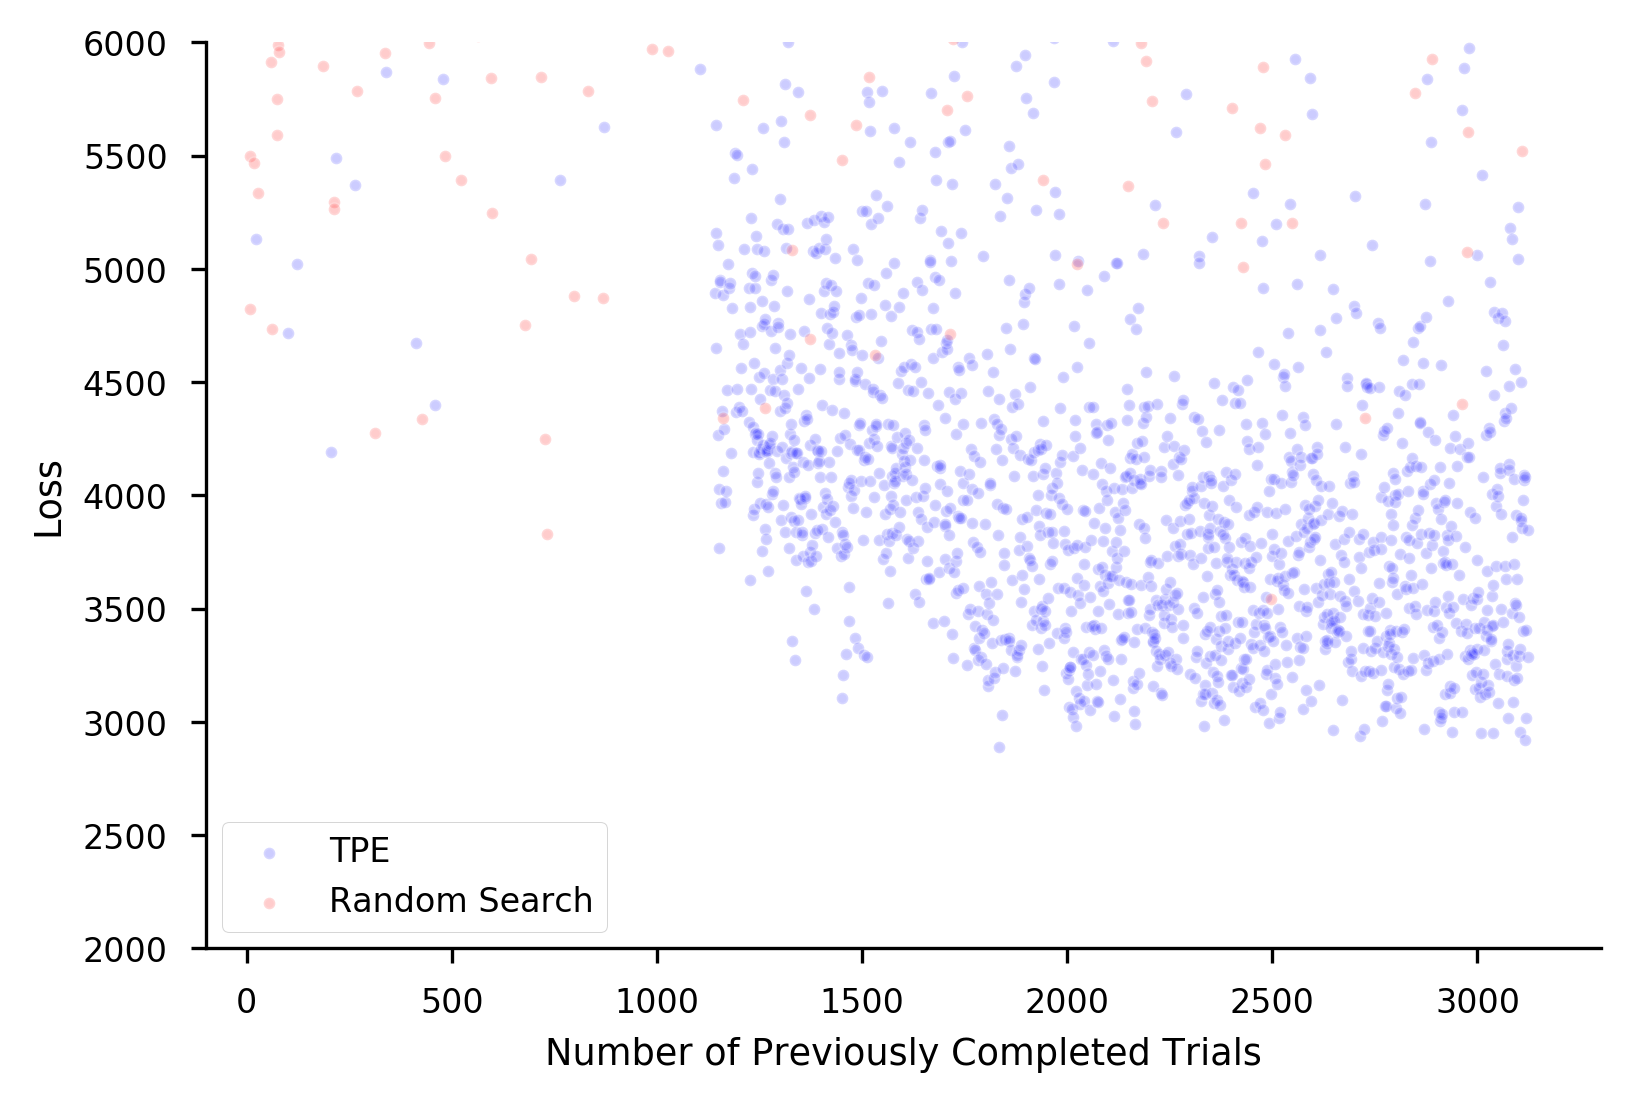

In [37]:
f, ax = plt.subplots(1, 1, figsize = (6, 4), dpi = 300)
sns.scatterplot(ax = ax, data = meras_tpe[meras_tpe['Seconds Elapased'] < 18900], x = 'num_before', y = 'Loss', color = 'b', alpha = .2, marker = '.')
sns.scatterplot(ax = ax, data = meras_random[meras_random['Seconds Elapased'] < 18900], x = 'num_before', y = 'Loss', color = 'r', alpha = .2, marker = '.')
# plt.vlines(x = error_lines, ymin =120, ymax = 500, alpha = .01)
plt.ylim(2000, 6000)
plt.xlim(-100, 3300)
ax.legend(labels=["TPE","Random Search"])
plt.xlabel('Number of Previously Completed Trials')
plt.ylabel('Loss')
# plt.title('NWTOPT vs. Random Search by epoch - Partridge Steady-State')
plt.savefig('./meras_loss_compare_adj.png')
plt.show()

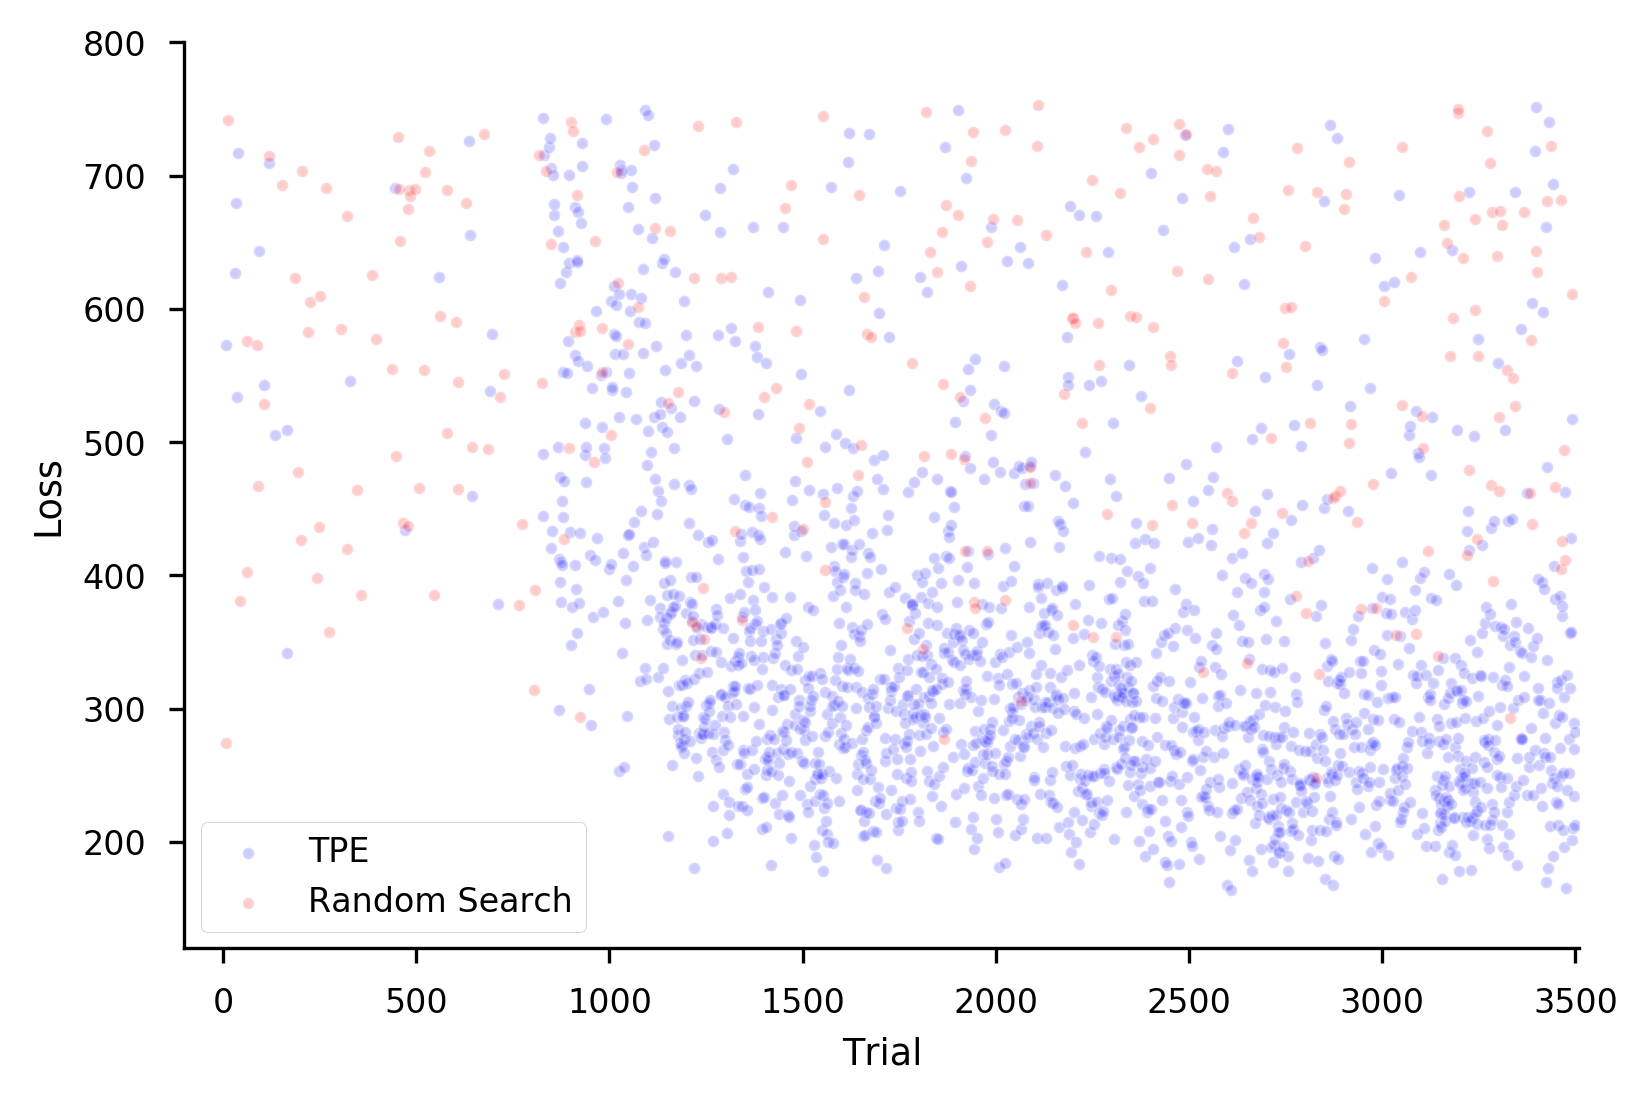

In [41]:
f, ax = plt.subplots(1, 1, figsize = (6, 4), dpi = 300)
sns.scatterplot(ax = ax, data = partridge_tpe[partridge_tpe['Seconds Elapased'] < 750], x = 'NWT Number', y = 'Loss', color = 'b', alpha = .2, marker = '.')
sns.scatterplot(ax = ax, data = partridge_random[partridge_random['Seconds Elapased'] < 750], x = 'NWT Number', y = 'Loss', color = 'r', alpha = .2, marker = '.')
# plt.vlines(x = error_lines, ymin =120, ymax = 500, alpha = .01)
plt.ylim(120, 800)
plt.xlim(-100, 3510)
ax.legend(labels=["TPE","Random Search"])
plt.xlabel('Trial')
plt.ylabel('Loss')
# plt.title('NWTOPT vs. Random Search by epoch - Partridge Steady-State')
plt.savefig('./partridge_loss_compare.png')
plt.show()

In [42]:
from tqdm import tqdm
partridge_tpe['Start Time'] = pd.to_datetime(partridge_tpe['Start Time'])
partridge_tpe['Finish Time'] = pd.to_datetime(partridge_tpe['Finish Time'])
num_before_col = []
for i in tqdm(range(3500)):
    num_before = 0
    curr_row_start = partridge_tpe.at[i, 'Start Time']
    for j in range(i):
        if partridge_tpe.at[j,'Finish Time'] < curr_row_start:
            num_before += 1
    num_before_col += [num_before]
partridge_tpe['num_before'] = num_before_col

partridge_random['Start Time'] = pd.to_datetime(partridge_random['Start Time'])
partridge_random['Finish Time'] = pd.to_datetime(partridge_random['Finish Time'])
num_before_col = []
for i in tqdm(range(3500)):
    num_before = 0
    curr_row_start = partridge_random.at[i, 'Start Time']
    for j in range(i):
        if partridge_random.at[j,'Finish Time'] < curr_row_start:
            num_before += 1
    num_before_col += [num_before]
partridge_random['num_before'] = num_before_col

100%|██████████| 3500/3500 [00:38<00:00, 90.83it/s] 


In [43]:
partridge_tpe.head()

,NWT Number,Start Time,Finish Time,Loss,Mass Balance,Seconds Elapased,# of Iterations,Min Loss,num_before
0,0,2021-09-26 16:56:27,2021-09-26 17:02:05,1.000000e+12,999999.0,999999.0,-1.0,9999.0,0
1,1,2021-09-26 16:56:28,2021-09-26 17:08:58,1.000000e+12,999999.0,750.0,-1.0,9999.0,0
2,2,2021-09-26 16:56:32,2021-09-26 17:09:02,1.000000e+12,999999.0,750.0,-1.0,9999.0,0
3,3,2021-09-26 16:56:36,2021-09-26 17:09:06,1.000000e+12,999999.0,750.0,-1.0,9999.0,0
4,4,2021-09-26 16:56:36,2021-09-26 17:09:06,1.000000e+12,999999.0,750.0,-1.0,9999.0,0


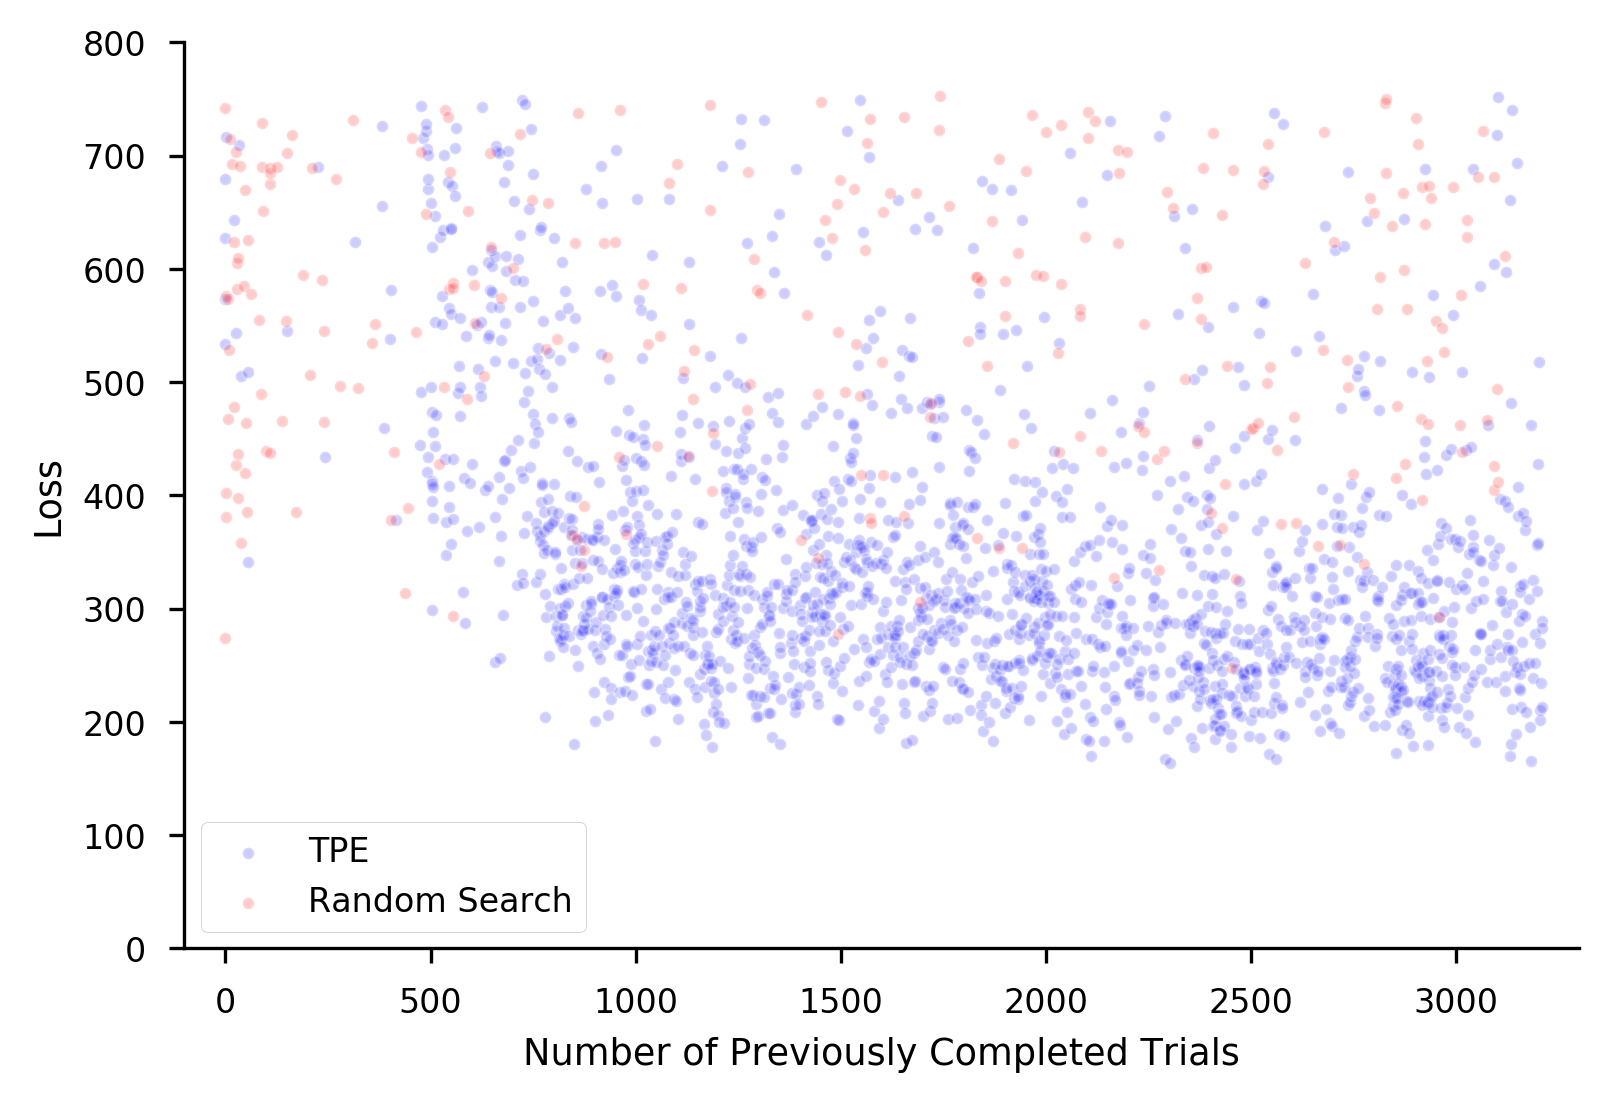

In [44]:
f, ax = plt.subplots(1, 1, figsize = (6, 4), dpi = 300)
sns.scatterplot(ax = ax, data = partridge_tpe[partridge_tpe['Seconds Elapased'] < 750], x = 'num_before', y = 'Loss', color = 'b', alpha = .2, marker = '.')
sns.scatterplot(ax = ax, data = partridge_random[partridge_random['Seconds Elapased'] < 750], x = 'num_before', y = 'Loss', color = 'r', alpha = .2, marker = '.')
# plt.vlines(x = error_lines, ymin =120, ymax = 500, alpha = .01)
plt.ylim(0, 800)
plt.xlim(-100, 3300)
ax.legend(labels=["TPE","Random Search"])
plt.xlabel('Number of Previously Completed Trials')
plt.ylabel('Loss')
# plt.title('NWTOPT vs. Random Search by epoch - Partridge Steady-State')
plt.savefig('./partridge_loss_compare_adj.png')
plt.show()

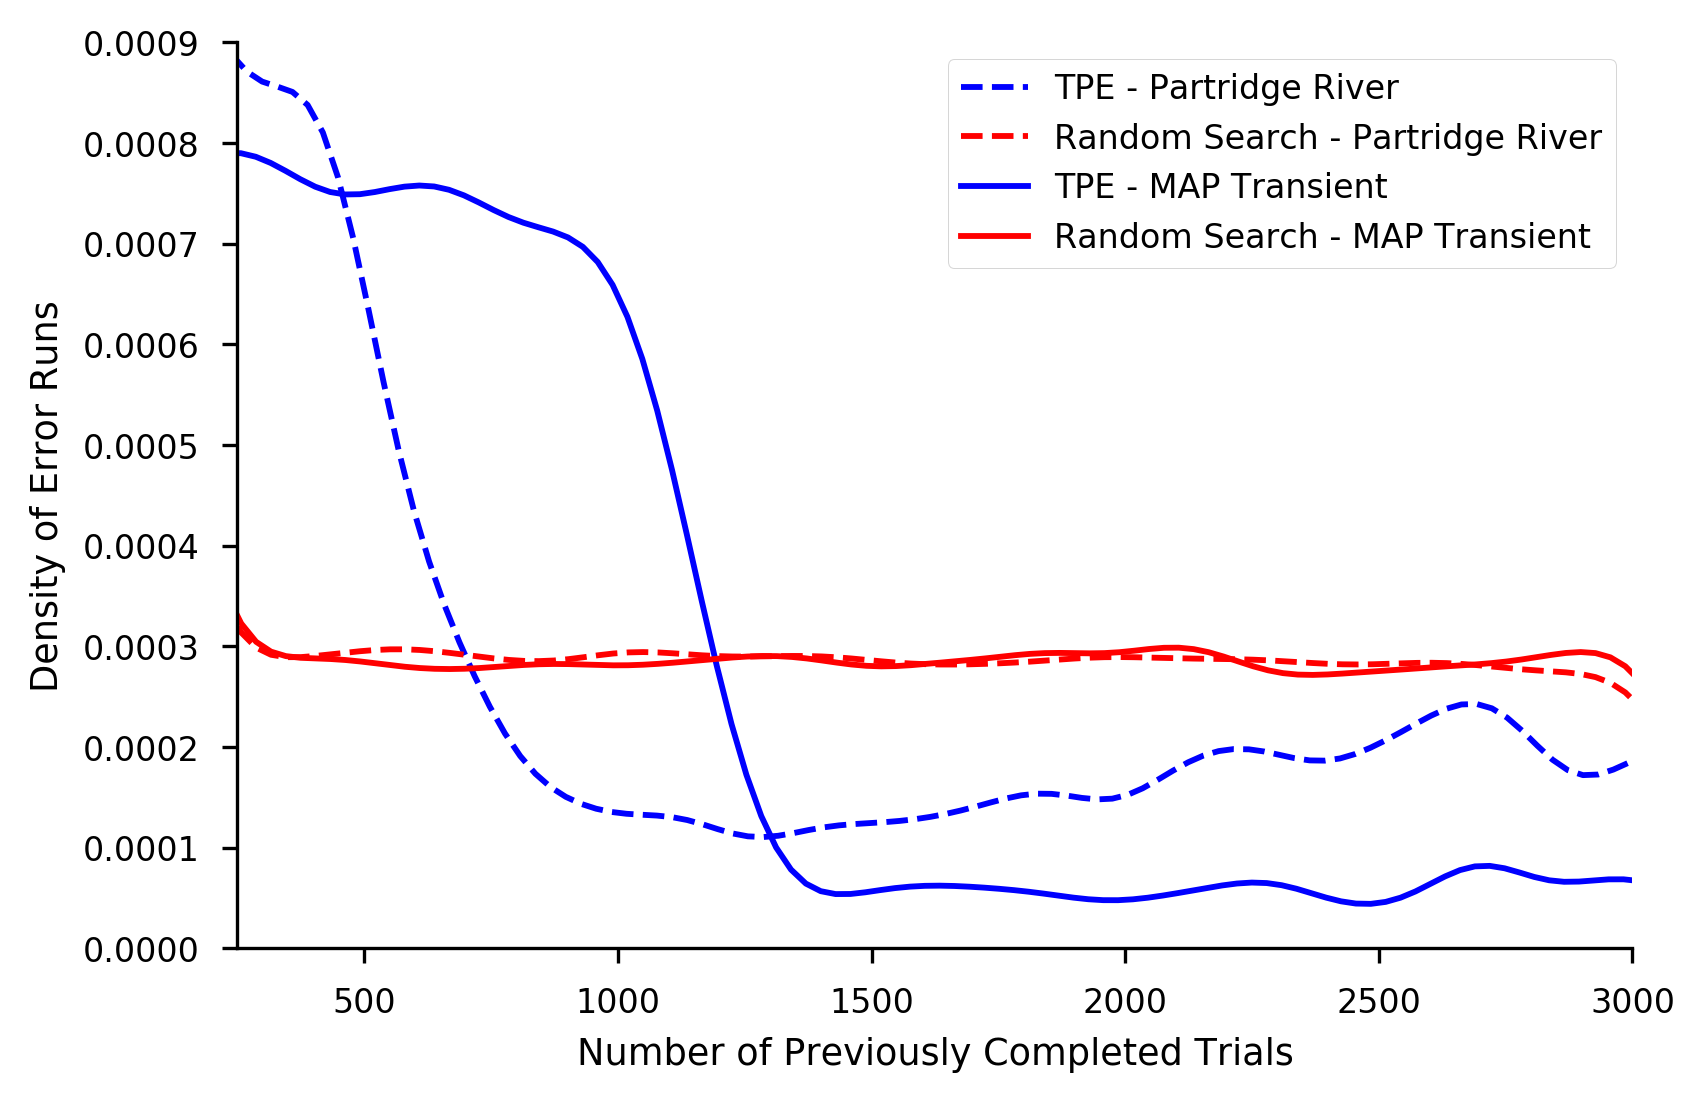

In [49]:
err_p_tpe = partridge_tpe[(partridge_tpe['Mass Balance'] == 999999)]['num_before'].to_list()
err_p_ran = partridge_random[(partridge_random['Mass Balance'] == 999999)]['num_before'].to_list()
err_m_tpe = meras_tpe[(meras_tpe['Mass Balance'] == 999999)]['num_before'].to_list()
err_m_ran = meras_random[(meras_random['Mass Balance'] == 999999)]['num_before'].to_list()
f, ax = plt.subplots(1, 1, figsize = (6, 4), dpi = 300)
sns.kdeplot(data = err_p_tpe, color = 'b', bw = 100, linestyle = 'dashed', label = 'TPE - Partridge River')
ran = sns.kdeplot(data = err_p_ran, color = 'r', bw = 100, linestyle = 'dashed', label = 'Random Search - Partridge River')
sns.kdeplot(ax = ax, data = err_m_tpe, color = 'b', bw = 100, label = 'TPE - MAP Transient')
sns.kdeplot(ax = ax, data = err_m_ran, color = 'r', bw = 100, label = 'Random Search - MAP Transient')
# ran.axhline(.00029, color = 'k', label = 'Average Random Search Performance', alpha = .4)
plt.xlim(250, 3000)
plt.ylim(0, .0009)
plt.legend()
plt.xlabel('Number of Previously Completed Trials')
plt.ylabel('Density of Error Runs')
# plt.title('Distribution of Errored Runs')
plt.savefig('./dist_Errors.png')
plt.show()
